In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
X = df[['horsepower','wheelbase','enginesize','boreratio','compressionratio','highwaympg','citympg','curbweight','carwidth','carlength']]
y = df['price']

In [ ]:
y.mean()

13276.710570731706

In [ ]:
#Memisahkan data menjadi train, val, test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [ ]:
len(X.columns)

10

In [ ]:
X.shape

(205, 10)

In [ ]:
X_train_std.shape

(147, 10)

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)
X_test_std = std.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(32))

In [ ]:
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

In [ ]:
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.RandomNormal(seed=40)))

In [ ]:
model.summary()

ValueError: ignored

In [ ]:

model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='linear')) #binary : sigmoid, #multiclass : softmax

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

model.summary()

In [ ]:
history = model.fit(X_train_std, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/10
5/5 [==============================] - 3s 40ms/step - loss: 13179.3965 - mae: 13179.3965 - val_loss: 13398.3613 - val_mae: 13398.3613
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 13178.9502 - mae: 13178.9502 - val_loss: 13397.9023 - val_mae: 13397.9023
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 13178.4629 - mae: 13178.4629 - val_loss: 13397.3535 - val_mae: 13397.3535
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 13177.8828 - mae: 13177.8828 - val_loss: 13396.6631 - val_mae: 13396.6631
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 13177.1143 - mae: 13177.1143 - val_loss: 13395.6973 - val_mae: 13395.6973
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 13176.0234 - mae: 13176.0234 - val_loss: 13394.2354 - val_mae: 13394.2354
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 13174.3008 - mae: 13174.3008 - val_loss: 13391.8467 - val_mae: 1

##Kernel Initializers

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.RandomNormal(seed=40)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

In [ ]:
history = model.fit(X_train_std, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/10
5/5 [==============================] - 3s 43ms/step - loss: 13192.2578 - mae: 13192.2578 - val_loss: 14990.9492 - val_mae: 14990.9492
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 13192.0586 - mae: 13192.0586 - val_loss: 14990.7412 - val_mae: 14990.7412
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 13191.8428 - mae: 13191.8428 - val_loss: 14990.5000 - val_mae: 14990.5000
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 13191.5928 - mae: 13191.5928 - val_loss: 14990.2090 - val_mae: 14990.2090
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 13191.2725 - mae: 13191.2725 - val_loss: 14989.8291 - val_mae: 14989.8291
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 13190.8389 - mae: 13190.8389 - val_loss: 14989.2852 - val_mae: 14989.2852
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 13190.1934 - mae: 13190.1934 - val_loss: 14988.4209 - val_mae: 1

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                704       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


## Batch Size

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.RandomNormal(seed=40)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=10, batch_size=16,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/10
10/10 [==============================] - 1s 16ms/step - loss: 13191.9795 - mae: 13191.9795 - val_loss: 14990.2344 - val_mae: 14990.2344
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 13190.8848 - mae: 13190.8848 - val_loss: 14988.5342 - val_mae: 14988.5342
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 13188.2217 - mae: 13188.2217 - val_loss: 14982.7109 - val_mae: 14982.7109
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 13167.1680 - mae: 13167.1680 - val_loss: 14800.1455 - val_mae: 14800.1455
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
10/10 [==============================] - 0s 4ms/st

## Activation Function

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))

model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 34ms/step - loss: 13192.5752 - mae: 13192.5752 - val_loss: 14991.2959 - val_mae: 14991.2959
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 13192.3457 - mae: 13192.3457 - val_loss: 14991.1094 - val_mae: 14991.1094
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 13192.1758 - mae: 13192.1758 - val_loss: 14990.9473 - val_mae: 14990.9473
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 13192.0186 - mae: 13192.0186 - val_loss: 14990.7891 - val_mae: 14990.7891
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 13191.8633 - mae: 13191.8633 - val_loss: 14990.6299 - val_mae: 14990.6299
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 13191.6973 - mae: 13191.6973 - val_loss: 14990.4492 - val_mae: 14990.4492
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 13191.5088 - mae: 13191.5088 - val_loss: 14990.2402 - val_mae: 1

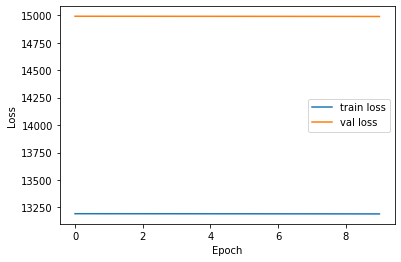

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(10),history.history['loss'],label='train loss')
ax.plot(range(10),history.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

##Batch normalization

struktur batch normalization yang sesuai adalah dilakukan sebelum activation function

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))

model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 93ms/step - loss: 13192.2256 - mae: 13192.2256 - val_loss: 14990.8652 - val_mae: 14990.8652
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.1533 - mae: 13192.1533 - val_loss: 14990.8154 - val_mae: 14990.8154
Epoch 3/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.0889 - mae: 13192.0889 - val_loss: 14990.7734 - val_mae: 14990.7734
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.0166 - mae: 13192.0156 - val_loss: 14990.7295 - val_mae: 14990.7295
Epoch 5/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.9463 - mae: 13191.9463 - val_loss: 14990.6895 - val_mae: 14990.6895
Epoch 6/40
3/3 [==============================] - 0s 14ms/step - loss: 13191.8662 - mae: 13191.8662 - val_loss: 14990.6387 - val_mae: 14990.6387
Epoch 7/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.7930 - mae: 13191.7939 - val_loss: 14990.5947 - val_m

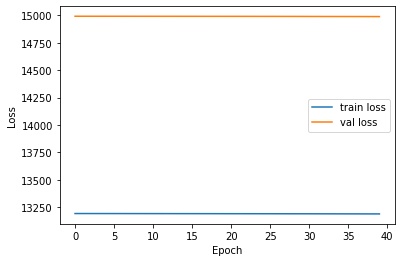

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Dropout

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 97ms/step - loss: 13192.3184 - mae: 13192.3184 - val_loss: 14990.8750 - val_mae: 14990.8750
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3057 - mae: 13192.3057 - val_loss: 14990.8379 - val_mae: 14990.8379
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.2354 - mae: 13192.2354 - val_loss: 14990.7959 - val_mae: 14990.7959
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.1680 - mae: 13192.1680 - val_loss: 14990.7617 - val_mae: 14990.7617
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.1729 - mae: 13192.1729 - val_loss: 14990.7227 - val_mae: 14990.7227
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.0693 - mae: 13192.0693 - val_loss: 14990.6855 - val_mae: 14990.6855
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 13191.9971 - mae: 13191.9971 - val_loss: 14990.6338 - val_m

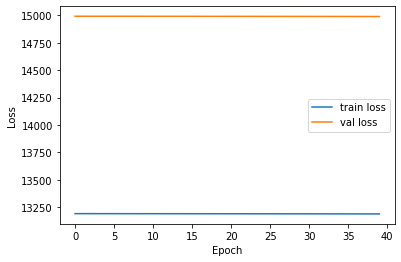

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Lerning Rate

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 96ms/step - loss: 13192.3262 - mae: 13192.3262 - val_loss: 14990.9238 - val_mae: 14990.9238
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3623 - mae: 13192.3623 - val_loss: 14990.9326 - val_mae: 14990.9326
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3340 - mae: 13192.3340 - val_loss: 14990.9395 - val_mae: 14990.9395
Epoch 4/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3184 - mae: 13192.3184 - val_loss: 14990.9473 - val_mae: 14990.9473
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3535 - mae: 13192.3535 - val_loss: 14990.9561 - val_mae: 14990.9561
Epoch 6/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.2959 - mae: 13192.2959 - val_loss: 14990.9648 - val_mae: 14990.9648
Epoch 7/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.2939 - mae: 13192.2939 - val_loss: 14990.9697 - val_m

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.08),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 104ms/step - loss: 13192.2324 - mae: 13192.2324 - val_loss: 14990.7129 - val_mae: 14990.7129
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 13191.5869 - mae: 13191.5869 - val_loss: 14990.0049 - val_mae: 14990.0049
Epoch 3/40
3/3 [==============================] - 0s 22ms/step - loss: 13190.9473 - mae: 13190.9473 - val_loss: 14989.1943 - val_mae: 14989.1943
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13190.0889 - mae: 13190.0889 - val_loss: 14988.0508 - val_mae: 14988.0508
Epoch 5/40
3/3 [==============================] - 0s 12ms/step - loss: 13188.5098 - mae: 13188.5098 - val_loss: 14986.2910 - val_mae: 14986.2910
Epoch 6/40
3/3 [==============================] - 0s 12ms/step - loss: 13187.0293 - mae: 13187.0293 - val_loss: 14983.9121 - val_mae: 14983.9121
Epoch 7/40
3/3 [==============================] - 0s 13ms/step - loss: 13184.2061 - mae: 13184.2061 - val_loss: 14980.4541 - val_

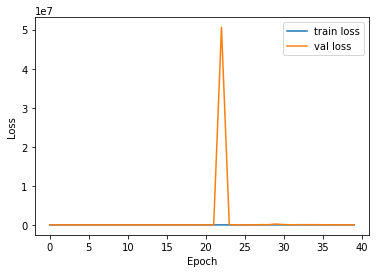

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Gradient Cliping

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(clipvalue=1.0),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 101ms/step - loss: 13192.3184 - mae: 13192.3193 - val_loss: 14990.8467 - val_mae: 14990.8467
Epoch 2/40
3/3 [==============================] - 0s 23ms/step - loss: 13192.3057 - mae: 13192.3057 - val_loss: 14990.8105 - val_mae: 14990.8105
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.2334 - mae: 13192.2334 - val_loss: 14990.7666 - val_mae: 14990.7666
Epoch 4/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.1680 - mae: 13192.1680 - val_loss: 14990.7334 - val_mae: 14990.7334
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.1709 - mae: 13192.1709 - val_loss: 14990.6943 - val_mae: 14990.6943
Epoch 6/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.0684 - mae: 13192.0684 - val_loss: 14990.6523 - val_mae: 14990.6523
Epoch 7/40
3/3 [==============================] - 0s 14ms/step - loss: 13191.9971 - mae: 13191.9971 - val_loss: 14990.6084 - val_

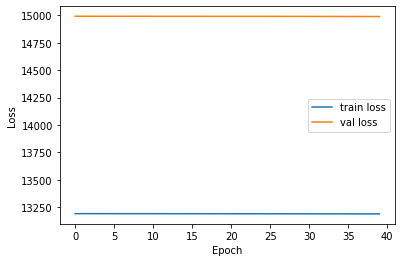

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Regularisasi

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 111ms/step - loss: 13192.5791 - mae: 13192.2402 - val_loss: 14990.6904 - val_mae: 14990.3545
Epoch 2/40
3/3 [==============================] - 0s 18ms/step - loss: 13192.1123 - mae: 13191.7764 - val_loss: 14990.2148 - val_mae: 14989.8818
Epoch 3/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.5791 - mae: 13191.2480 - val_loss: 14989.5156 - val_mae: 14989.1855
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13190.8184 - mae: 13190.4902 - val_loss: 14988.5098 - val_mae: 14988.1846
Epoch 5/40
3/3 [==============================] - 0s 13ms/step - loss: 13189.8213 - mae: 13189.4961 - val_loss: 14986.8701 - val_mae: 14986.5469
Epoch 6/40
3/3 [==============================] - 0s 22ms/step - loss: 13188.2021 - mae: 13187.8789 - val_loss: 14984.2842 - val_mae: 14983.9629
Epoch 7/40
3/3 [==============================] - 0s 13ms/step - loss: 13185.6426 - mae: 13185.3242 - val_loss: 14979.9238 - val_

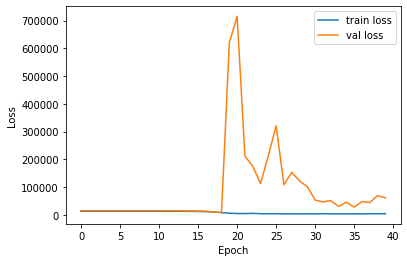

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Activation Function Elu

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 106ms/step - loss: 13192.5752 - mae: 13192.2354 - val_loss: 14990.7031 - val_mae: 14990.3662
Epoch 2/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.1504 - mae: 13191.8154 - val_loss: 14990.1855 - val_mae: 14989.8545
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13191.5801 - mae: 13191.2480 - val_loss: 14989.4580 - val_mae: 14989.1279
Epoch 4/40
3/3 [==============================] - 0s 15ms/step - loss: 13190.8369 - mae: 13190.5088 - val_loss: 14988.3916 - val_mae: 14988.0654
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 13189.9502 - mae: 13189.6250 - val_loss: 14987.0088 - val_mae: 14986.6855
Epoch 6/40
3/3 [==============================] - 0s 14ms/step - loss: 13188.3125 - mae: 13187.9912 - val_loss: 14984.2227 - val_mae: 14983.9033
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 13185.8193 - mae: 13185.5000 - val_loss: 14980.3213 - val_

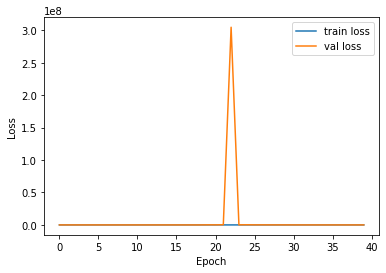

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

### Combination Activation Function

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(60,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(50,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(20,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))


model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=16, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/16
3/3 [==============================] - 2s 139ms/step - loss: 13193.8545 - mae: 13192.2002 - val_loss: 14991.8721 - val_mae: 14990.2197
Epoch 2/16
3/3 [==============================] - 0s 16ms/step - loss: 13193.1543 - mae: 13191.5068 - val_loss: 14990.8223 - val_mae: 14989.1846
Epoch 3/16
3/3 [==============================] - 0s 16ms/step - loss: 13192.1309 - mae: 13190.4961 - val_loss: 14989.8330 - val_mae: 14988.2109
Epoch 4/16
3/3 [==============================] - 0s 15ms/step - loss: 13190.8057 - mae: 13189.1875 - val_loss: 14987.5723 - val_mae: 14985.9609
Epoch 5/16
3/3 [==============================] - 0s 25ms/step - loss: 13188.8359 - mae: 13187.2266 - val_loss: 14984.6270 - val_mae: 14983.0234
Epoch 6/16
3/3 [==============================] - 0s 26ms/step - loss: 13185.4863 - mae: 13183.8867 - val_loss: 14979.7148 - val_mae: 14978.1279
Epoch 7/16
3/3 [==============================] - 0s 25ms/step - loss: 13179.7529 - mae: 13178.1699 - val_loss: 14972.8652 - val_

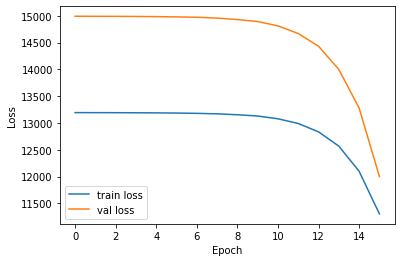

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(16),history.history['loss'],label='train loss')
ax.plot(range(16),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

### Optimaizer

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 99ms/step - loss: 13192.6592 - mae: 13192.3193 - val_loss: 14991.1660 - val_mae: 14990.8281
Epoch 2/40
3/3 [==============================] - 0s 16ms/step - loss: 13192.6973 - mae: 13192.3604 - val_loss: 14991.1689 - val_mae: 14990.8340
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.6572 - mae: 13192.3242 - val_loss: 14991.1738 - val_mae: 14990.8428
Epoch 4/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.6152 - mae: 13192.2852 - val_loss: 14991.1826 - val_mae: 14990.8516
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.6699 - mae: 13192.3389 - val_loss: 14991.1895 - val_mae: 14990.8594
Epoch 6/40
3/3 [==============================] - 0s 23ms/step - loss: 13192.5820 - mae: 13192.2539 - val_loss: 14991.1963 - val_mae: 14990.8682
Epoch 7/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.5830 - mae: 13192.2578 - val_loss: 14991.1904 - val_m

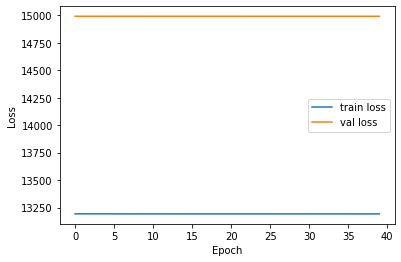

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(14,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 2s 104ms/step - loss: 13192.6465 - mae: 13192.2998 - val_loss: 14991.6787 - val_mae: 14991.3340
Epoch 2/40
3/3 [==============================] - 0s 16ms/step - loss: 13192.6465 - mae: 13192.3018 - val_loss: 14991.6533 - val_mae: 14991.3105
Epoch 3/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.5684 - mae: 13192.2236 - val_loss: 14991.6299 - val_mae: 14991.2871
Epoch 4/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.6738 - mae: 13192.3311 - val_loss: 14991.6084 - val_mae: 14991.2656
Epoch 5/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.4648 - mae: 13192.1230 - val_loss: 14991.6035 - val_mae: 14991.2617
Epoch 6/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.6025 - mae: 13192.2627 - val_loss: 14991.5791 - val_mae: 14991.2402
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.6045 - mae: 13192.2656 - val_loss: 14991.5625 - val_

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.LecunNormal(seed=40)))

model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 100ms/step - loss: 13192.3164 - mae: 13192.3164 - val_loss: 14991.5605 - val_mae: 14991.5605
Epoch 2/40
3/3 [==============================] - 0s 23ms/step - loss: 13192.2021 - mae: 13192.2021 - val_loss: 14991.6689 - val_mae: 14991.6689
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.2598 - mae: 13192.2598 - val_loss: 14991.4795 - val_mae: 14991.4795
Epoch 4/40
3/3 [==============================] - 0s 23ms/step - loss: 13192.2031 - mae: 13192.2031 - val_loss: 14991.3779 - val_mae: 14991.3779
Epoch 5/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.2080 - mae: 13192.2080 - val_loss: 14991.3662 - val_mae: 14991.3662
Epoch 6/40
3/3 [==============================] - 0s 16ms/step - loss: 13192.2539 - mae: 13192.2539 - val_loss: 14991.2939 - val_mae: 14991.2939
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 13192.1660 - mae: 13192.1660 - val_loss: 14991.3447 - val_

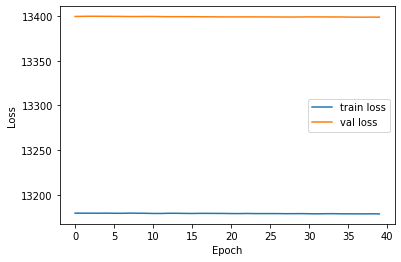

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Adamax (Gradient Vanish)

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adamax(),
              metrics=tf.keras.metrics.RootMeanSquaredError())

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 93ms/step - loss: 13192.3252 - root_mean_squared_error: 15285.6357 - val_loss: 14990.9189 - val_root_mean_squared_error: 17624.6016
Epoch 2/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3545 - root_mean_squared_error: 15285.5898 - val_loss: 14990.9189 - val_root_mean_squared_error: 17624.6016
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 13192.3184 - root_mean_squared_error: 15285.6055 - val_loss: 14990.9209 - val_root_mean_squared_error: 17624.6055
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.2930 - root_mean_squared_error: 15285.5508 - val_loss: 14990.9219 - val_root_mean_squared_error: 17624.6055
Epoch 5/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.3271 - root_mean_squared_error: 15285.6211 - val_loss: 14990.9258 - val_root_mean_squared_error: 17624.6055
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 1319

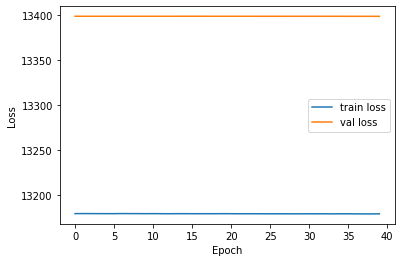

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Momentum & Nesterov

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))

model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True))

history = model.fit(X_train_std, y_train, epochs=100, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 129ms/step - loss: 13192.4141 - val_loss: 14990.9277
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 13192.2549 - val_loss: 14990.7266
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 13192.0713 - val_loss: 14990.4375
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 13191.7471 - val_loss: 14990.0420
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 13191.3662 - val_loss: 14989.5557
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 13190.9668 - val_loss: 14988.9697
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 13190.3721 - val_loss: 14988.2295
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 13189.7666 - val_loss: 14987.2939
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 13188.8457 - val_loss: 14985.9766
Epoch 10/100
3/3 [===========================

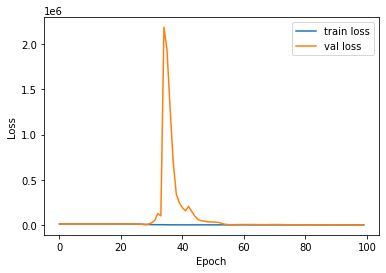

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(100),history.history['loss'],label='train loss')
ax.plot(range(100),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))

model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True))

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 89ms/step - loss: 13192.4141 - val_loss: 14990.9277
Epoch 2/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.2549 - val_loss: 14990.7266
Epoch 3/40
3/3 [==============================] - 0s 12ms/step - loss: 13192.0713 - val_loss: 14990.4375
Epoch 4/40
3/3 [==============================] - 0s 16ms/step - loss: 13191.7471 - val_loss: 14990.0420
Epoch 5/40
3/3 [==============================] - 0s 12ms/step - loss: 13191.3662 - val_loss: 14989.5557
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 13190.9668 - val_loss: 14988.9697
Epoch 7/40
3/3 [==============================] - 0s 12ms/step - loss: 13190.3721 - val_loss: 14988.2295
Epoch 8/40
3/3 [==============================] - 0s 12ms/step - loss: 13189.7666 - val_loss: 14987.2939
Epoch 9/40
3/3 [==============================] - 0s 13ms/step - loss: 13188.8457 - val_loss: 14985.9766
Epoch 10/40
3/3 [==============================] - 0s 2

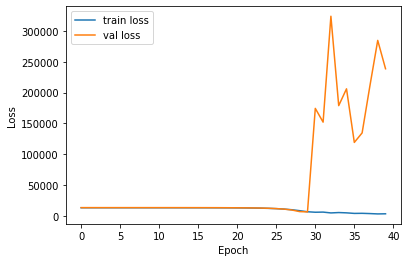

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Final Model

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

history = model.fit(X_train_std, y_train, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 96ms/step - loss: 13192.2256 - mae: 13192.2256 - val_loss: 14990.8652 - val_mae: 14990.8652
Epoch 2/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.1533 - mae: 13192.1533 - val_loss: 14990.8154 - val_mae: 14990.8154
Epoch 3/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.0889 - mae: 13192.0889 - val_loss: 14990.7734 - val_mae: 14990.7734
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 13192.0166 - mae: 13192.0156 - val_loss: 14990.7295 - val_mae: 14990.7295
Epoch 5/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.9463 - mae: 13191.9463 - val_loss: 14990.6895 - val_mae: 14990.6895
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.8662 - mae: 13191.8662 - val_loss: 14990.6387 - val_mae: 14990.6387
Epoch 7/40
3/3 [==============================] - 0s 13ms/step - loss: 13191.7930 - mae: 13191.7939 - val_loss: 14990.5947 - val_m

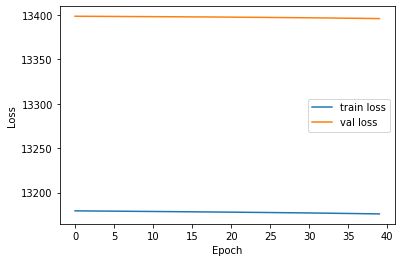

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

## Evaluation & Prediction

In [ ]:
model.evaluate(X_test_std, y_test) 

1/1 [==============================] - 0s 19ms/step - loss: 10843.6729 - mae: 10843.6729


[10843.6728515625, 10843.6728515625]

In [ ]:
X_test_std[1]

array([-0.58319394, -0.24429326, -0.47797525,  1.14134388, -0.16280911,
        0.3234921 ,  0.43540411, -0.70717045, -0.24987162, -0.15567921])

In [ ]:
X_new = X_test_std[1]

In [ ]:
X_new.shape

(10,)

In [ ]:
X_new = X_new.reshape(1,10)

In [ ]:
X_new.shape

(1, 10)

In [ ]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 414ms/step


hasil prediksi

In [ ]:
y_pred

array([[1.4379995]], dtype=float32)

membandingkan dengan data asli

In [ ]:
y_test.iloc[1]

7775.0

In [ ]:
y_test.iloc[1] - y_pred

array([[7773.562]], dtype=float32)

## Scaling Y

In [ ]:
y_train_std = y_train/y_train.max()
y_val_std = y_val/y_val.max()
y_test_std = y_test/y_test.max()

In [ ]:
tf.random.set_seed(42) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(nesterov=True),
              metrics=tf.keras.metrics.RootMeanSquaredError())

history = model.fit(X_train_std, y_train_std, epochs=40, batch_size=70,
                    validation_data=(X_val_std, y_val_std),verbose=1)

Epoch 1/40
3/3 [==============================] - 1s 96ms/step - loss: 0.4149 - root_mean_squared_error: 0.4659 - val_loss: 0.2289 - val_root_mean_squared_error: 0.3183
Epoch 2/40
3/3 [==============================] - 0s 15ms/step - loss: 0.3649 - root_mean_squared_error: 0.4160 - val_loss: 0.2229 - val_root_mean_squared_error: 0.3070
Epoch 3/40
3/3 [==============================] - 0s 14ms/step - loss: 0.3379 - root_mean_squared_error: 0.3885 - val_loss: 0.2205 - val_root_mean_squared_error: 0.3077
Epoch 4/40
3/3 [==============================] - 0s 21ms/step - loss: 0.2961 - root_mean_squared_error: 0.3315 - val_loss: 0.2060 - val_root_mean_squared_error: 0.2900
Epoch 5/40
3/3 [==============================] - 0s 14ms/step - loss: 0.2946 - root_mean_squared_error: 0.3462 - val_loss: 0.2024 - val_root_mean_squared_error: 0.2859
Epoch 6/40
3/3 [==============================] - 0s 15ms/step - loss: 0.2662 - root_mean_squared_error: 0.3106 - val_loss: 0.1974 - val_root_mean_squared_

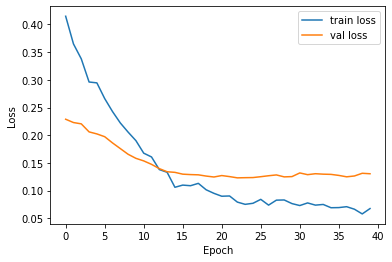

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(40),history.history['loss'],label='train loss')
ax.plot(range(40),history.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [ ]:
model.evaluate(X_test_std, y_test_std) 

1/1 [==============================] - 0s 22ms/step - loss: 0.0956 - root_mean_squared_error: 0.1860


[0.09557442367076874, 0.18604245781898499]

In [ ]:
X_new = X_test_std[1]
X_new = X_new.reshape(1,10)
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 93ms/step


In [ ]:
X_new

array([[-0.58319394, -0.24429326, -0.47797525,  1.14134388, -0.16280911,
         0.3234921 ,  0.43540411, -0.70717045, -0.24987162, -0.15567921]])

In [ ]:
y_pred * y_test.max()

array([[6623.404]], dtype=float32)

In [ ]:
y_test_std.iloc[1] * y_test.max()

7775.0

In [ ]:
(y_pred * y_test.max()) - (y_test_std.iloc[1] * y_test.max())

array([[1511.352]], dtype=float32)